**Harsha Somaya**

Spring 2022

CS 251: Data Analysis and Visualization

# Lab 4a: Pandas and Principle Component Analysis

In [2]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import scipy as sp
from mpl_toolkits.mplot3d import Axes3D

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.figsize': [8,8]})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

/tmp/ipykernel_1165/2394358706.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
/tmp/ipykernel_1165/2394358706.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])


 

## Task 1:  Introduction to Pandas

We are going to be using Pandas, covariance matrices and principle component analysis to explore a dataset on breast cancer diagnosis data. More information about the dataset can be found [here.](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original))
1. Import dataset using pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to create a Dataframe from the url:  https://raw.githubusercontent.com/patrickmlong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv 
2. Using the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation:
    1. In one method call get the shape and print the results.
    2. **To get the column headers and print them.**
    3. In one method call get the first 5 items and print the results.
    4. Find the mean of each column
3. Create a `cancer_x` dataframe which includes columns 2-11 (radius_mean - fractal_dimension_mean).
4. Update `cancer_x` to be normalized from 0-1, by subtracting by the minimum and dividing by the range. 
5. Create a `cancer_y` series with from the column `diagnosis` and set it to be [lowercase](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.capitalize.html)


In [3]:
url="https://raw.githubusercontent.com/patrickmlong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv"
# data = np.array(np.genfromtxt('data/data.csv', skip_header=1,delimiter=','))


# df = pd.DataFrame(data)
df=pd.read_csv(url)
print(df.shape)
print(list(df.columns))

print(df.head())





(569, 33)
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402    

In [4]:

print(df.mean(axis=0))


id                         3.037183e+07
radius_mean                1.412729e+01
texture_mean               1.928965e+01
perimeter_mean             9.196903e+01
area_mean                  6.548891e+02
smoothness_mean            9.636028e-02
compactness_mean           1.043410e-01
concavity_mean             8.879932e-02
concave points_mean        4.891915e-02
symmetry_mean              1.811619e-01
fractal_dimension_mean     6.279761e-02
radius_se                  4.051721e-01
texture_se                 1.216853e+00
perimeter_se               2.866059e+00
area_se                    4.033708e+01
smoothness_se              7.040979e-03
compactness_se             2.547814e-02
concavity_se               3.189372e-02
concave points_se          1.179614e-02
symmetry_se                2.054230e-02
fractal_dimension_se       3.794904e-03
radius_worst               1.626919e+01
texture_worst              2.567722e+01
perimeter_worst            1.072612e+02
area_worst                 8.805831e+02


/tmp/ipykernel_1165/3012161676.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.mean(axis=0))


In [5]:
cancer_x=df.iloc[:,2:12]
print(cancer_x.head(n=5))


   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  
0                 0.07871  
1                 0.05667  
2       

5. Create a `cancer_y` series with from the column `diagnosis` and set it to be [lowercase](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.capitalize.html)

In [6]:
cancer_x_min = cancer_x.min()
cancer_x_max = cancer_x.max()
cancer_x_range = cancer_x_max - cancer_x_min
cancer_x_normalized = (cancer_x - cancer_x_min)/cancer_x_range
print("\n\nnormalized samples : \n", cancer_x_normalized)




normalized samples : 
      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       0.521037      0.022658        0.545989   0.363733         0.593753   
1       0.643144      0.272574        0.615783   0.501591         0.289880   
2       0.601496      0.390260        0.595743   0.449417         0.514309   
3       0.210090      0.360839        0.233501   0.102906         0.811321   
4       0.629893      0.156578        0.630986   0.489290         0.430351   
..           ...           ...             ...        ...              ...   
564     0.690000      0.428813        0.678668   0.566490         0.526948   
565     0.622320      0.626987        0.604036   0.474019         0.407782   
566     0.455251      0.621238        0.445788   0.303118         0.288165   
567     0.644564      0.663510        0.665538   0.475716         0.588336   
568     0.036869      0.501522        0.028540   0.015907         0.000000   

     compactness_mean  concavity_mean 

In [7]:
cancer_y=df.loc[:,'diagnosis'] 
cancer_y.str.lower()


0      m
1      m
2      m
3      m
4      m
      ..
564    m
565    m
566    m
567    m
568    b
Name: diagnosis, Length: 569, dtype: object

## Task 2: Create and Visualize a Covariance Matrix

1. Use the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation to find out how to compute the pairwise covariance of the `cancer_x` columns, store the resulting covariance matrix, and print its shape.
2. Use the [matplotlib](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html) and [imshow](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.imshow.html) documentation to visualize the covariance matrix with a heatmap.
    1. Include a title
    2. Include labels for each row and column 
        1. Set the `xticks`, `yticks`, `xticklabels` and `ytickslabels`
        1. If necessary, rotating the text for the x-axis using `setp`
    3. Use an perceptually uniform sequential [colormap](https://matplotlib.org/tutorials/colors/colormaps.html). 
        1. Set it using the `cmap` parameter for `imshow`
    4. Include a [colorbar](https://matplotlib.org/3.1.1/gallery/axes_grid1/simple_colorbar.html).
    
**Question:** What interpretations can you draw from this covariance matrix?

There is not a string pattern to the covairnace, most coviarance between concave points mean to itself 

(10, 10)
                        radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                0.027818      0.007855        0.027946   0.024582   
texture_mean               0.007855      0.021156        0.008048   0.006972   
perimeter_mean             0.027946      0.008048        0.028195   0.024727   
area_mean                  0.024582      0.006972        0.024727   0.022283   
smoothness_mean            0.003612     -0.000432        0.004419   0.003355   
compactness_mean           0.013675      0.005577        0.015149   0.012054   
concavity_mean             0.021083      0.008216        0.022461   0.019127   
concave points_mean        0.026458      0.008232        0.027558   0.023701   
symmetry_mean              0.003412      0.001438        0.004255   0.003127   
fractal_dimension_mean    -0.007729     -0.001653       -0.006529  -0.006284   

                        smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                    0.

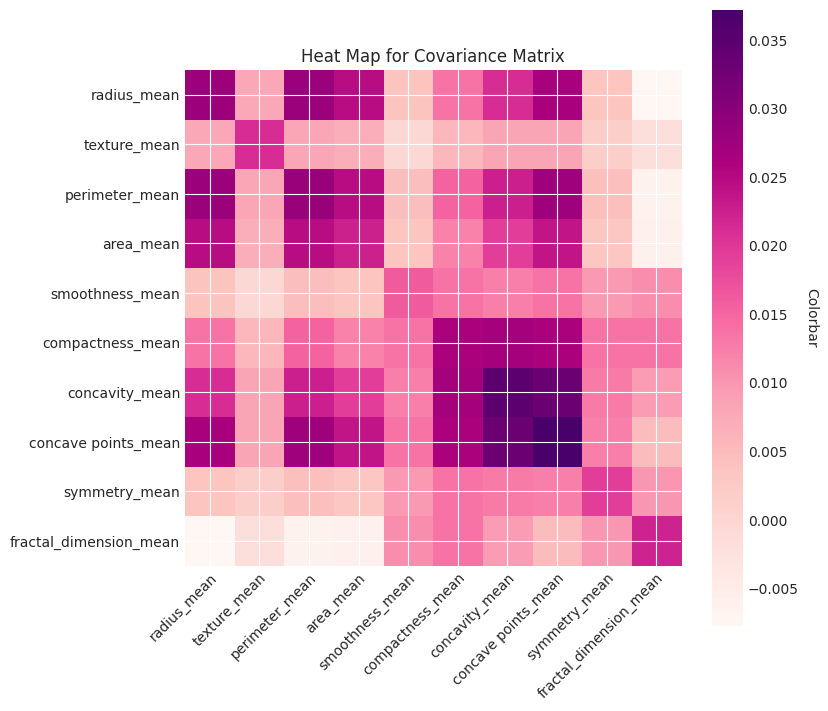

In [8]:
covariance=cancer_x_normalized.cov()
print(covariance.shape)
print(covariance)
fig, ax = plt.subplots()
im = ax.imshow(covariance, cmap=plt.colormaps["RdPu"])
ax.set_xticks(np.arange(len(covariance.columns)), labels=covariance.columns)
ax.set_yticks(np.arange(len(covariance.columns)), labels=covariance.columns)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.set_title("Heat Map for Covariance Matrix")
cbar = ax.figure.colorbar(im, ax=ax, )
cbar.ax.set_ylabel("Colorbar", rotation=-90, va="bottom");



## Task 3: Visualizing Principle Component Analysis

### 3a) Principle Component Analysis
1. Use [numpy.linalg.eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) to compute the eigenvalues and right eigenvectors of the covariance matrix.  
1. Print the eigen_values and the first 2 eigenvectors.
2. Transform the data with the eigen_vectors.
    1. Matrix multiply cancer_x with the first two columns of the eigen_vectors. 
    2. Print the first 5 rows of the transformed data.

**Question:**  Which 2 variables are the first eigenvector most dependent on?  How does that relate to the heatmap?

In [9]:
(evals, evectors) = np.linalg.eig(covariance)
print("Eigen values:\n ", (evals))
print("First 2 Eigen vectors:\n", evectors[:,:2])
transformed=cancer_x_normalized@evectors[:,:2]
print("Transformed data:\n",transformed.head())


Eigen values:
  [0.15632 0.05609 0.01875 0.01012 0.00688 0.00348 0.00001 0.00027 0.00121
 0.00206]
First 2 Eigen vectors:
 [[-0.36654  0.33267]
 [-0.1315   0.11754]
 [-0.38051  0.30003]
 [-0.32796  0.28817]
 [-0.16268 -0.33468]
 [-0.34395 -0.32018]
 [-0.43907 -0.17375]
 [-0.47861 -0.04037]
 [-0.16356 -0.34204]
 [-0.05141 -0.58234]]
Transformed data:
           0         1
0 -1.692053 -0.746755
1 -1.105772  0.158411
2 -1.479314 -0.159259
3 -1.335070 -1.286536
4 -1.364975 -0.036868


In [10]:


print('''
-----------------------------------
Your results should look like this:
-----------------------------------
Eigen values: 
[0.15632 0.05609 0.01875 0.01012 0.00688 0.00348 0.00001 0.00027 0.00121 0.00206]
First 2 Eigen vectors: 
[[-0.36654  0.33267]
 [-0.1315   0.11754]
 [-0.38051  0.30003]
 [-0.32796  0.28817]
 [-0.16268 -0.33468]
 [-0.34395 -0.32018]
 [-0.43907 -0.17375]
 [-0.47861 -0.04037]
 [-0.16356 -0.34204]
 [-0.05141 -0.58234]]
Transformed data:
           0         1
0 -1.692053 -0.746755
1 -1.105772  0.158411
2 -1.479314 -0.159259
3 -1.335070 -1.286536
4 -1.364975 -0.036868
-----------------------------------
''')


-----------------------------------
Your results should look like this:
-----------------------------------
Eigen values: 
[0.15632 0.05609 0.01875 0.01012 0.00688 0.00348 0.00001 0.00027 0.00121 0.00206]
First 2 Eigen vectors: 
[[-0.36654  0.33267]
 [-0.1315   0.11754]
 [-0.38051  0.30003]
 [-0.32796  0.28817]
 [-0.16268 -0.33468]
 [-0.34395 -0.32018]
 [-0.43907 -0.17375]
 [-0.47861 -0.04037]
 [-0.16356 -0.34204]
 [-0.05141 -0.58234]]
Transformed data:
           0         1
0 -1.692053 -0.746755
1 -1.105772  0.158411
2 -1.479314 -0.159259
3 -1.335070 -1.286536
4 -1.364975 -0.036868
-----------------------------------



**Question:**  Which 2 variables are the first eigenvector most dependent on?  How does that relate to the heatmap?

On the 7 and 8th variables. In the heat map, these are the areas with the largest value (most purple)

### 3b) Graph a scatterplot of the transformed data

Graph a scatterplot of the transformed data using [plt.scatter](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.axes.Axes.scatter.html)
1. Scatter Parameters
    1. Graph the first principle component on the x axis (first column of the tranformed data)
    2. Graph the second principle component on the y axis (second column of the tranformed data)
    3. Use the `cancer_y` series for the color with a black edgecolor
3. Include a title, and axis labels.
4. Add a custom [legend](https://matplotlib.org/3.3.3/tutorials/intermediate/legend_guide.html) using mpatches.
    1. Create 1 patch with the color `m` for malignant
    1. Create 1 patch with the color `b` for benign

In [11]:
print(cancer_y)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


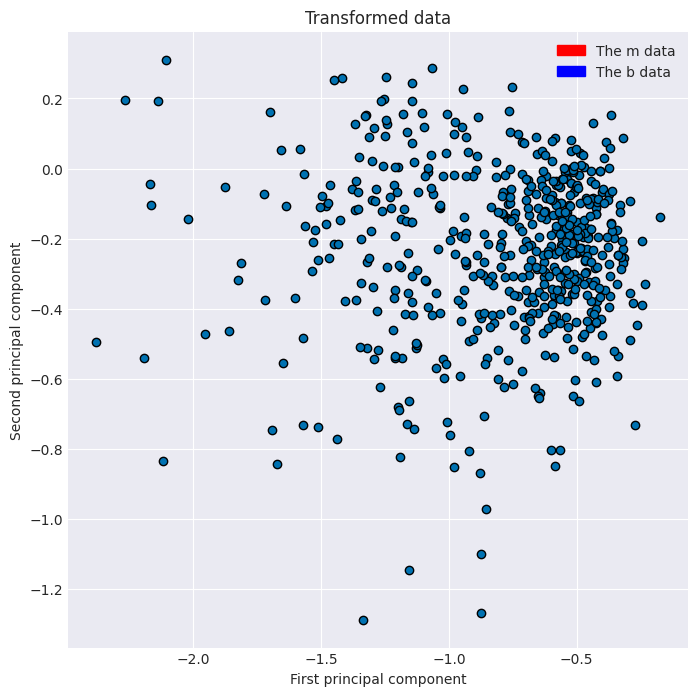

In [26]:
import matplotlib.patches as mpatches

# fig, ax = plt.subplots()
# scatter = ax.scatter(transformed.iloc[:,0], transformed.iloc[:,1], c=cancer_y, edgecolors='black')
plt.scatter(transformed.iloc[:,0], transformed.iloc[:,1],edgecolors="black")
plt.ylabel("Second principal component")
plt.xlabel("First principal component")
plt.title("Transformed data")


m_patch = mpatches.Patch(color='red', label='The m data')
b_patch = mpatches.Patch(color='blue', label='The b data')

plt.legend(handles=[m_patch,b_patch])

plt.show()



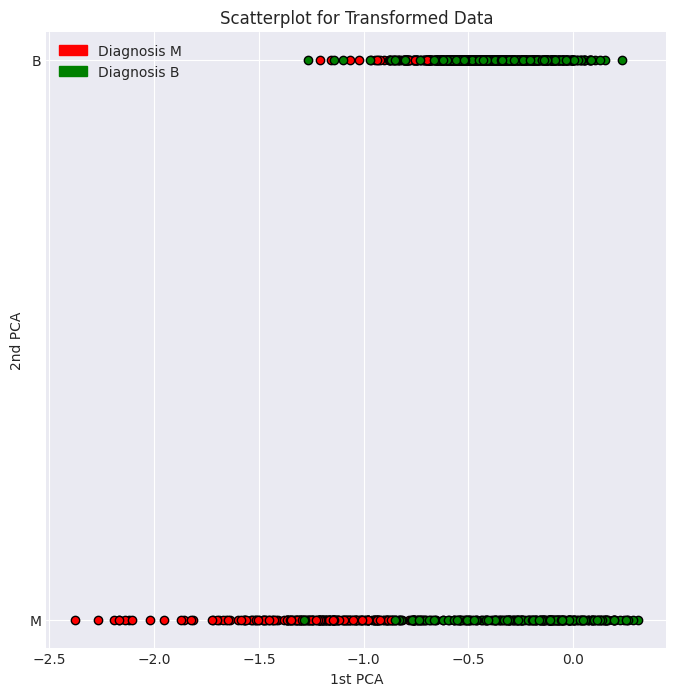

In [21]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots()

ax.scatter(transformed[0], cancer_y,c='r' ,edgecolors='black')
ax.scatter(transformed[1], cancer_y,c='g' ,edgecolors='black')

ax.set_title("Scatterplot for Transformed Data")
ax.set_xlabel("1st PCA")
ax.set_ylabel("2nd PCA")
malignant_patch = mpatches.Patch(color='r', label='Diagnosis M')
benign_patch = mpatches.Patch(color='g', label='Diagnosis B')
plt.legend(handles=[malignant_patch, benign_patch])
plt.show()